Loading the Ames housing dataset...

Dataset loaded. Working with 'Neighborhood' and 'SalePrice'.
Original data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  1460 non-null   object
 1   SalePrice     1460 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.9+ KB
None

Calculating mean 'SalePrice' for each category in 'Neighborhood'...

Generated Encoding Map (first 5 entries):
Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
Name: SalePrice, dtype: float64

Successfully created the new encoded column: 'Neighborhood_TargetEncoded'

Head of the DataFrame with the new encoded feature:
  Neighborhood  SalePrice  Neighborhood_TargetEncoded
0      CollgCr     208500               197965.773333
1      Veenker     181500        

C:\Users\basde\AppData\Local\Temp\ipykernel_20012\56897366.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)


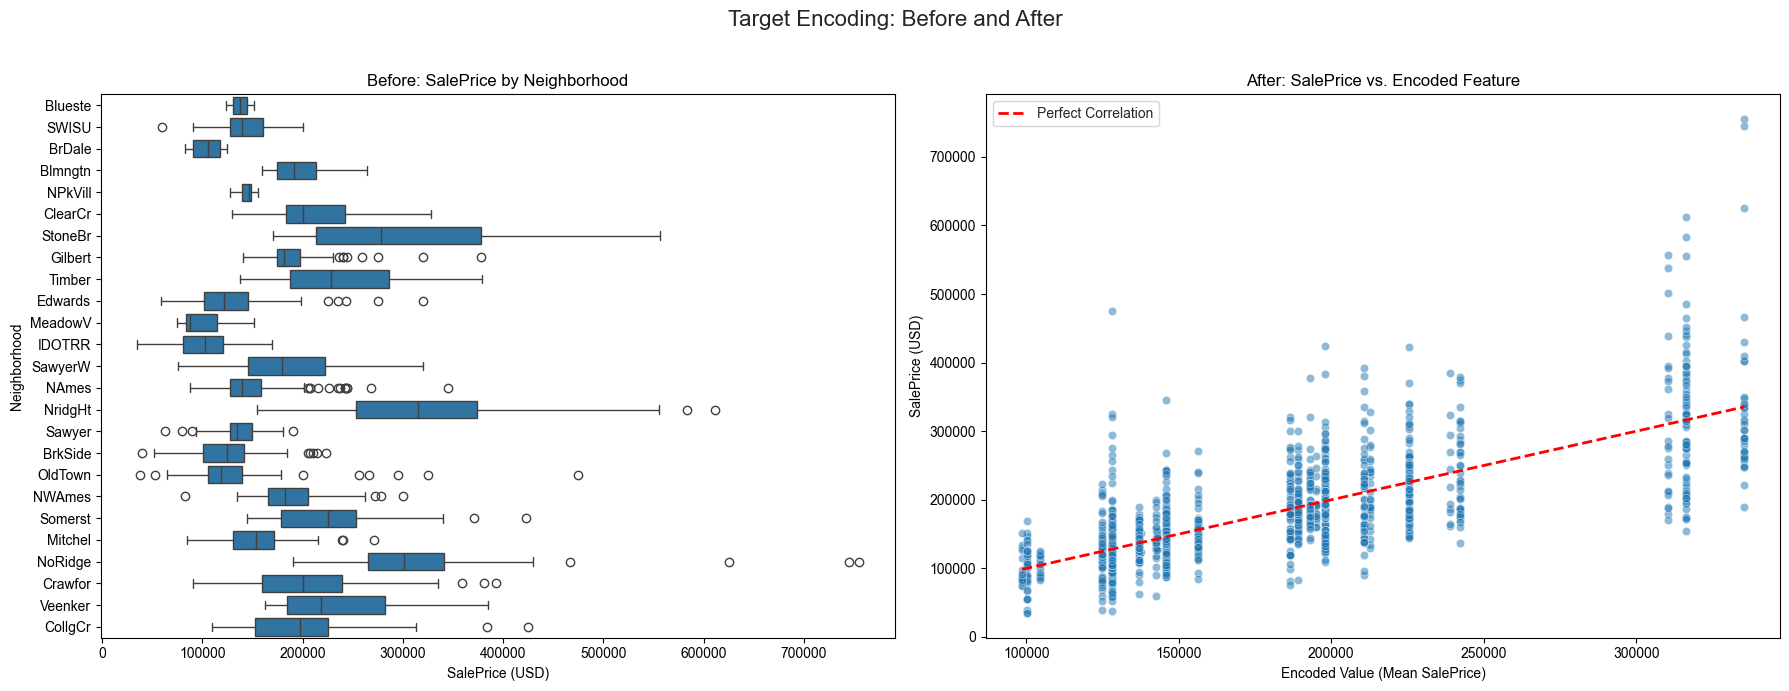


Visualization complete. The 'Before' plot shows the different average sale prices for each neighborhood.
The 'After' plot shows how the new encoded feature now has a direct, linear relationship with the target.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# ---
# What is Target Encoding and When to Use It?
# ---
#
# Target Encoding (or Mean Encoding) is a technique for converting categorical features into numerical ones.
# It works by replacing each category with the mean of the target variable for that specific category.
#
# When to use it:
# - It is particularly useful for categorical features with high cardinality (many unique categories),
#   where other methods like One-Hot Encoding would create a very large number of new columns (the "curse of dimensionality").
# - It can sometimes improve model performance by capturing a direct relationship between the feature's categories and the target.
#
# Requirements & Caveats:
# - It requires a target variable to be present.
# - It is prone to overfitting and data leakage. To prevent this, the encoding should be calculated on the training
#   set ONLY and then applied to the validation/test sets. For a more robust implementation, you might use a library
#   like `category_encoders` which handles this properly. For this demonstration, we will apply it to the whole
#   dataset to clearly illustrate the core concept.
# - Categories with very few data points can get assigned unreliable mean values. This can be mitigated with smoothing techniques.

# 1. FIND AND LOAD A RELEVANT DATASET FROM SCIKIT-LEARN
# We'll use the Ames housing dataset, which is a great example for regression tasks.
# It has many categorical features and a clear numerical target ('SalePrice').
print("Loading the Ames housing dataset...")
housing = fetch_openml(name="house_prices", as_frame=True)
df = housing.frame

# For simplicity, let's select our feature of interest and the target variable.
# 'Neighborhood' is a classic categorical feature. 'SalePrice' is our target.
feature_to_encode = 'Neighborhood'
target_variable = 'SalePrice'
df_subset = df[[feature_to_encode, target_variable]].copy()

# Drop rows where the feature or target is missing to keep the example simple
df_subset.dropna(subset=[feature_to_encode, target_variable], inplace=True)

print(f"\nDataset loaded. Working with '{feature_to_encode}' and '{target_variable}'.")
print("Original data types:")
print(df_subset.info())


# 2. APPLY THE TARGET ENCODING (MEAN ENCODING)
# We will calculate the mean 'SalePrice' for each 'Neighborhood'.
print(f"\nCalculating mean '{target_variable}' for each category in '{feature_to_encode}'...")
# The result is a pandas Series where the index is the category (e.g., 'CollgCr')
# and the value is the mean SalePrice for that category.
encoding_map = df_subset.groupby(feature_to_encode)[target_variable].mean()

print("\nGenerated Encoding Map (first 5 entries):")
print(encoding_map.head())

# Now, we map these mean values back to our original DataFrame to create the new numerical feature.
encoded_feature_name = f'{feature_to_encode}_TargetEncoded'
df_subset[encoded_feature_name] = df_subset[feature_to_encode].map(encoding_map)

print(f"\nSuccessfully created the new encoded column: '{encoded_feature_name}'")


# 3. SHOW THE RESULT OF APPLYING THE TECHNIQUE
# We can see the new column alongside the original categorical feature.
print("\nHead of the DataFrame with the new encoded feature:")
print(df_subset.head(10))

# 4. CREATE A "BEFORE-AND-AFTER" VISUALIZATION
# This helps to understand the effect of the transformation.

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.set_style("whitegrid")
fig.suptitle('Target Encoding: Before and After', fontsize=16)

# --- Before: Distribution of SalePrice for each Neighborhood ---
# A boxplot is a great way to see the distribution and mean for each category.
sns.boxplot(ax=axes[0], x=target_variable, y=feature_to_encode, data=df_subset, orient='h')
axes[0].set_title(f'Before: {target_variable} by {feature_to_encode}')
axes[0].set_xlabel(f'{target_variable} (USD)')
axes[0].set_ylabel(f'{feature_to_encode}')
# Order the y-axis by the mean sale price for better visualization
ordered_cats = encoding_map.sort_values().index
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0)
axes[0].set_ylim(axes[0].get_ylim()[::-1]) # Invert y-axis to match sorted order

# --- After: The relationship between the encoded feature and the target ---
# A scatter plot shows the new direct relationship.
sns.scatterplot(ax=axes[1], x=encoded_feature_name, y=target_variable, data=df_subset, alpha=0.5)
axes[1].set_title(f'After: {target_variable} vs. Encoded Feature')
axes[1].set_xlabel(f'Encoded Value (Mean {target_variable})')
axes[1].set_ylabel(f'{target_variable} (USD)')

# Add a line to show the perfect 1-to-1 relationship for clarity
min_val = df_subset[encoded_feature_name].min()
max_val = df_subset[encoded_feature_name].max()
axes[1].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Perfect Correlation')
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print("\nVisualization complete. The 'Before' plot shows the different average sale prices for each neighborhood.")
print("The 'After' plot shows how the new encoded feature now has a direct, linear relationship with the target.")
